In [229]:
%pip install spacy natasha

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: spacy in c:\users\danil\appdata\roaming\python\python311\site-packages (3.7.1)




[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [230]:
import spacy
from spacy import displacy
import spacy.parts_of_speech
from pathlib import Path
from random import seed, randint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [242]:
nlp = spacy.load("ru_core_news_sm")
POS = dir(parts_of_speech)[:23]

In [232]:
def get_pos_distribution(book_text: str) -> pd.Series:
    pos_freq_dist = pd.Series(index=POS, data=[0 for p in POS])
    doc = nlp(book_text)
    for tok in doc:
        pos_freq_dist[tok.pos_] += 1

    return pos_freq_dist

In [252]:
p = Path("./")
book_paths = p.glob("**/*.txt")

pdist_df = pd.DataFrame(columns=["Title", *POS])

for bp in book_paths:
    # display(pdist_df)
    pfreq_dist = get_pos_distribution(bp.read_text(encoding="utf-8-sig"))
    pfreq_no_zero = pfreq_dist[pfreq_dist != 0]
    pdist_df.loc[len(pdist_df)] = [bp.name, *pfreq_dist]


## Распределение частей речи для каждой книги

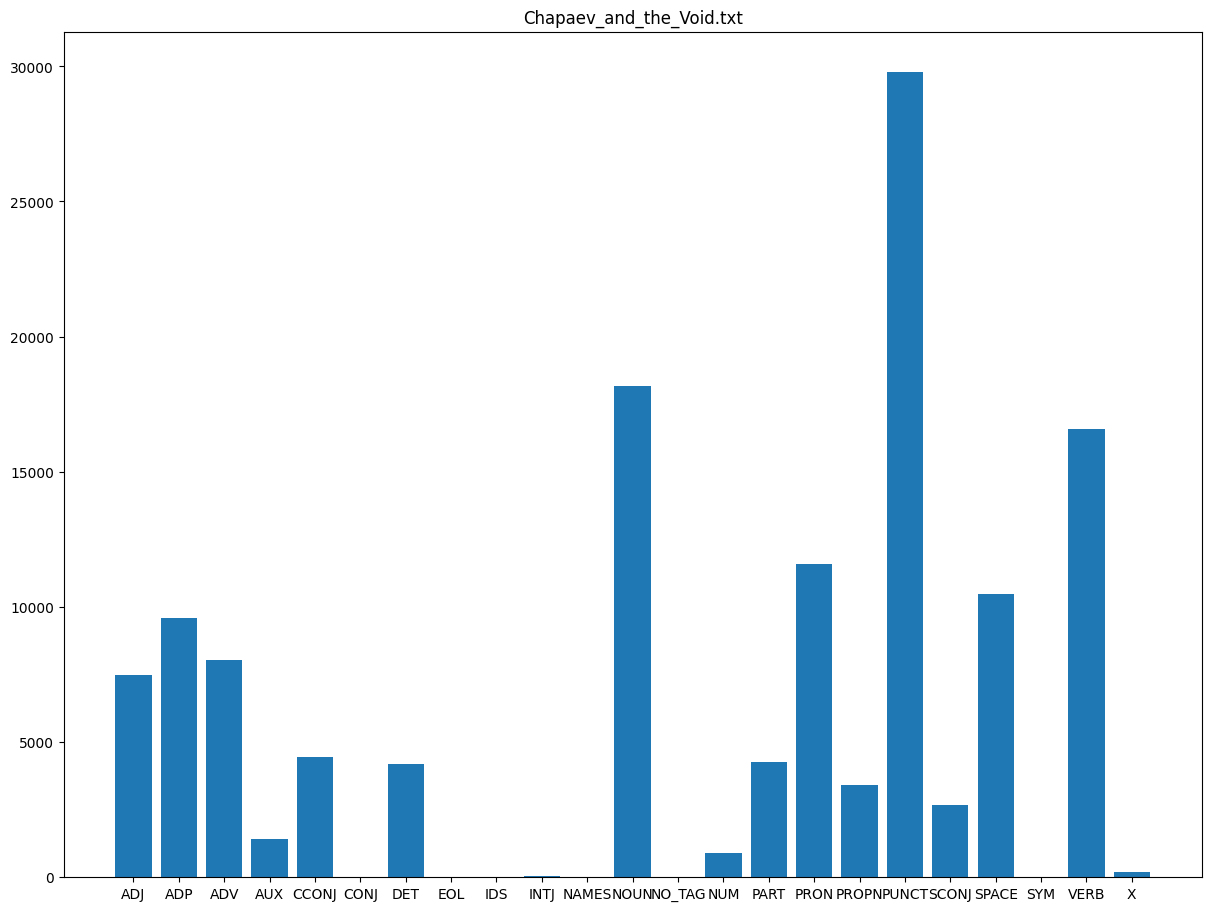

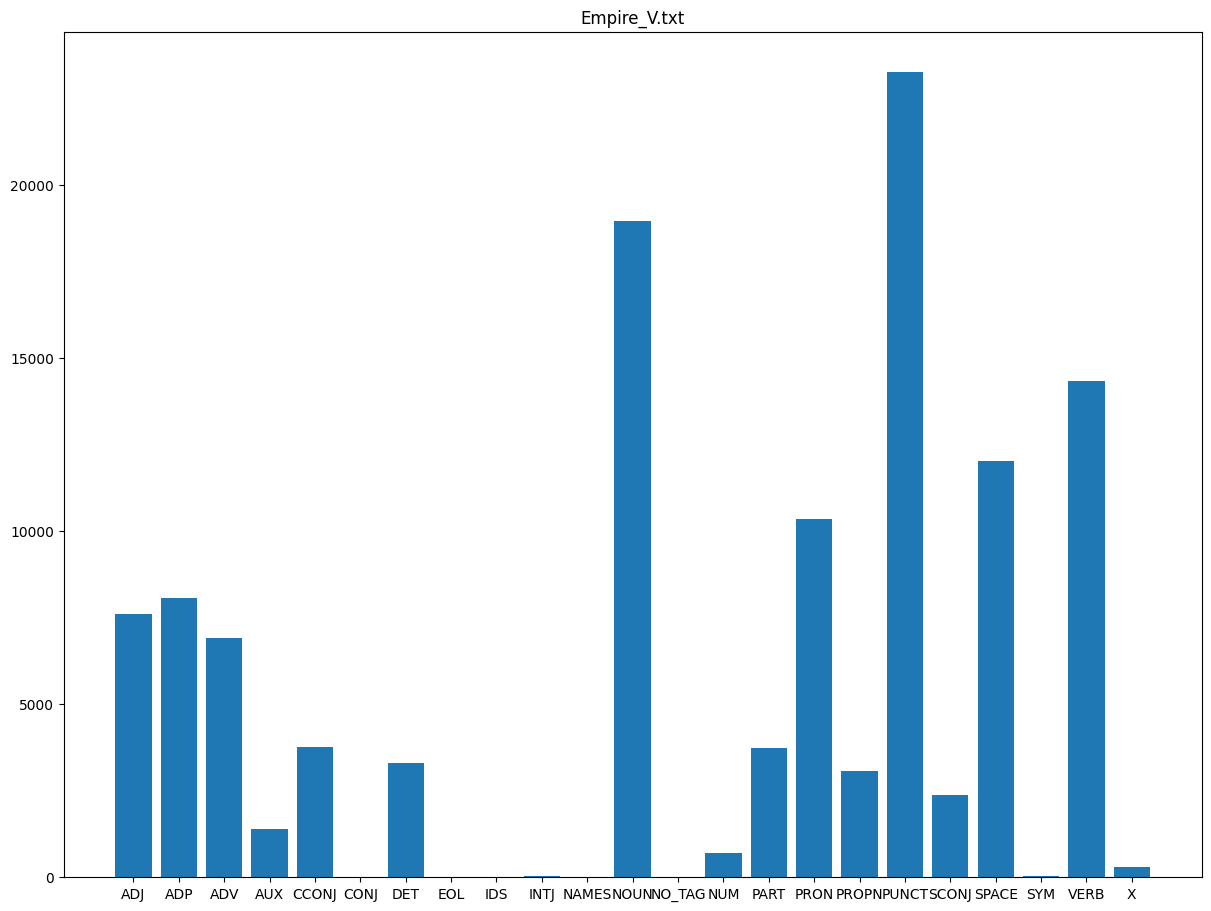

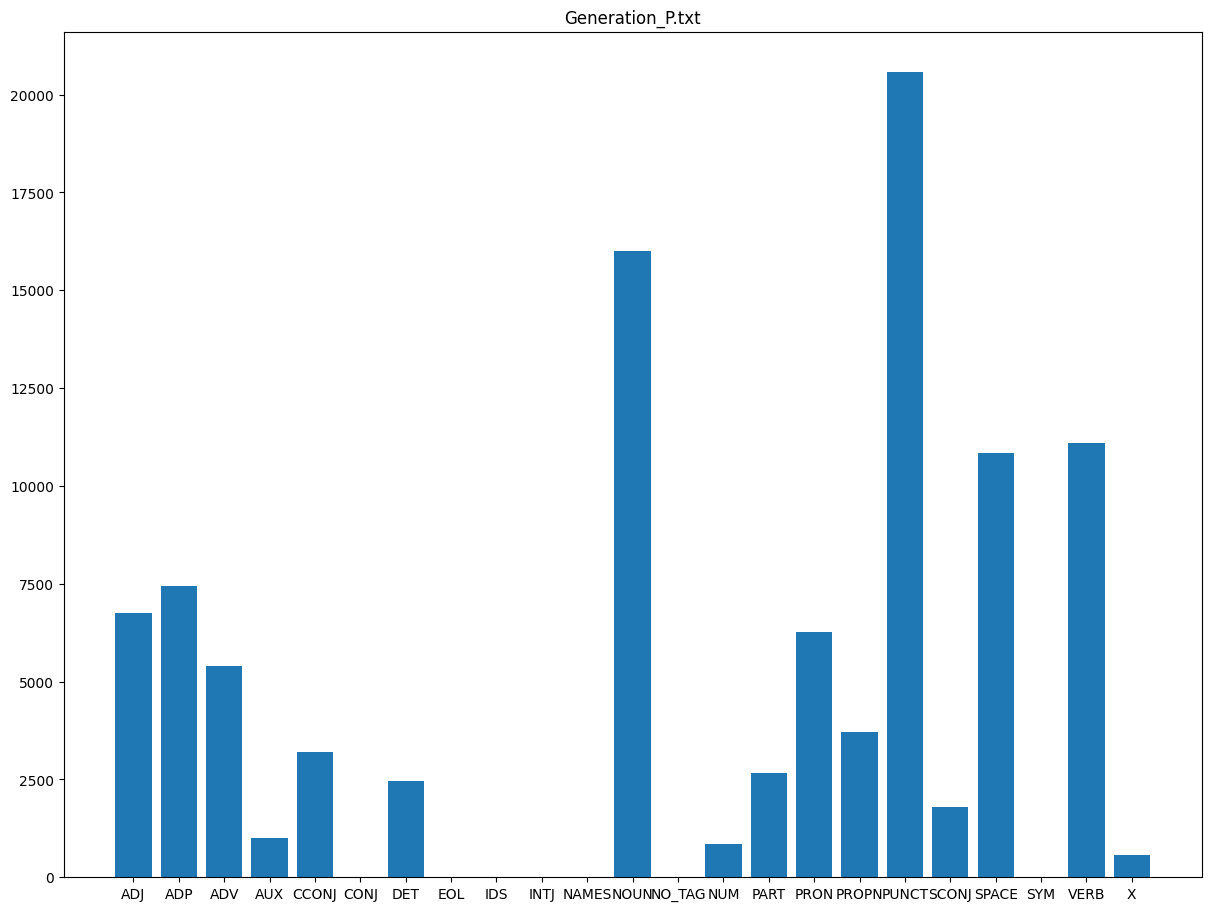

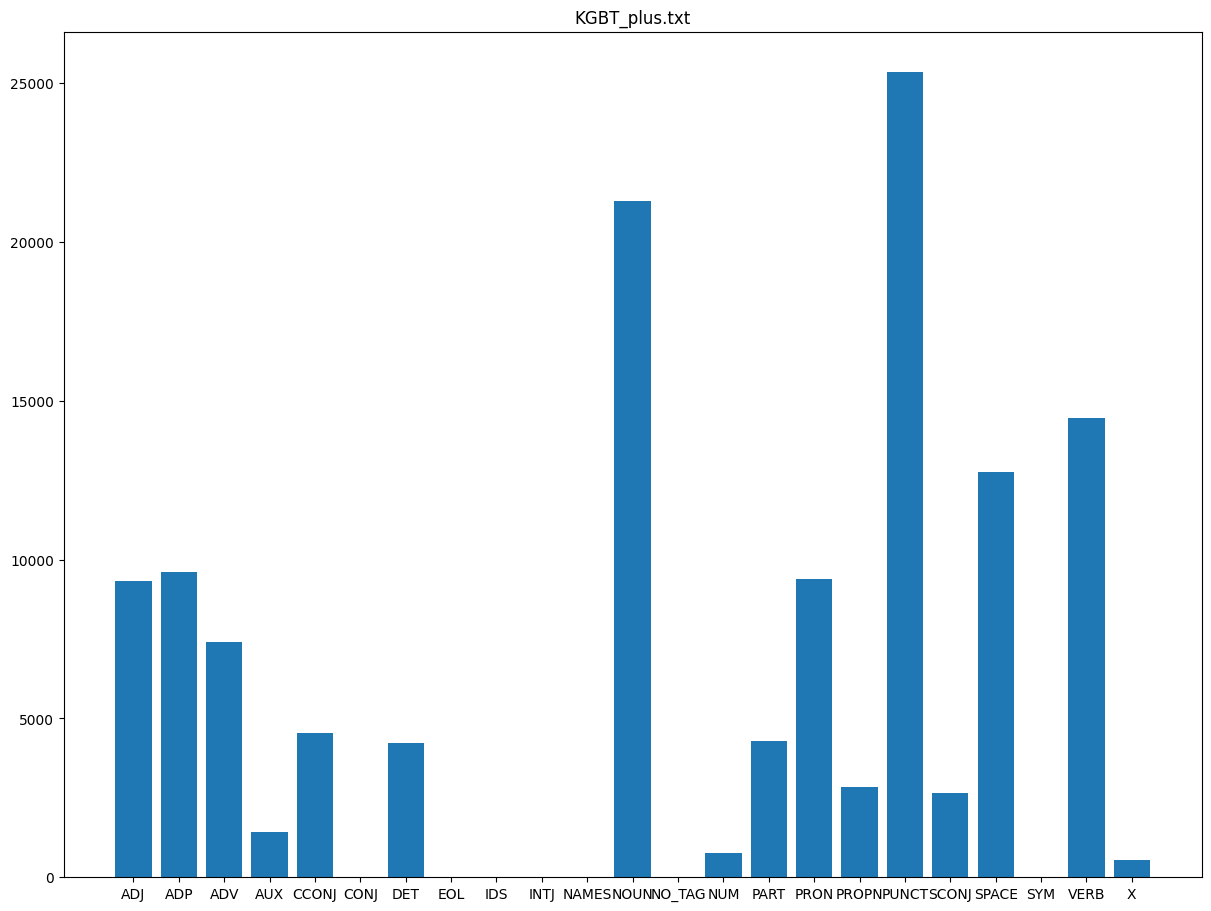

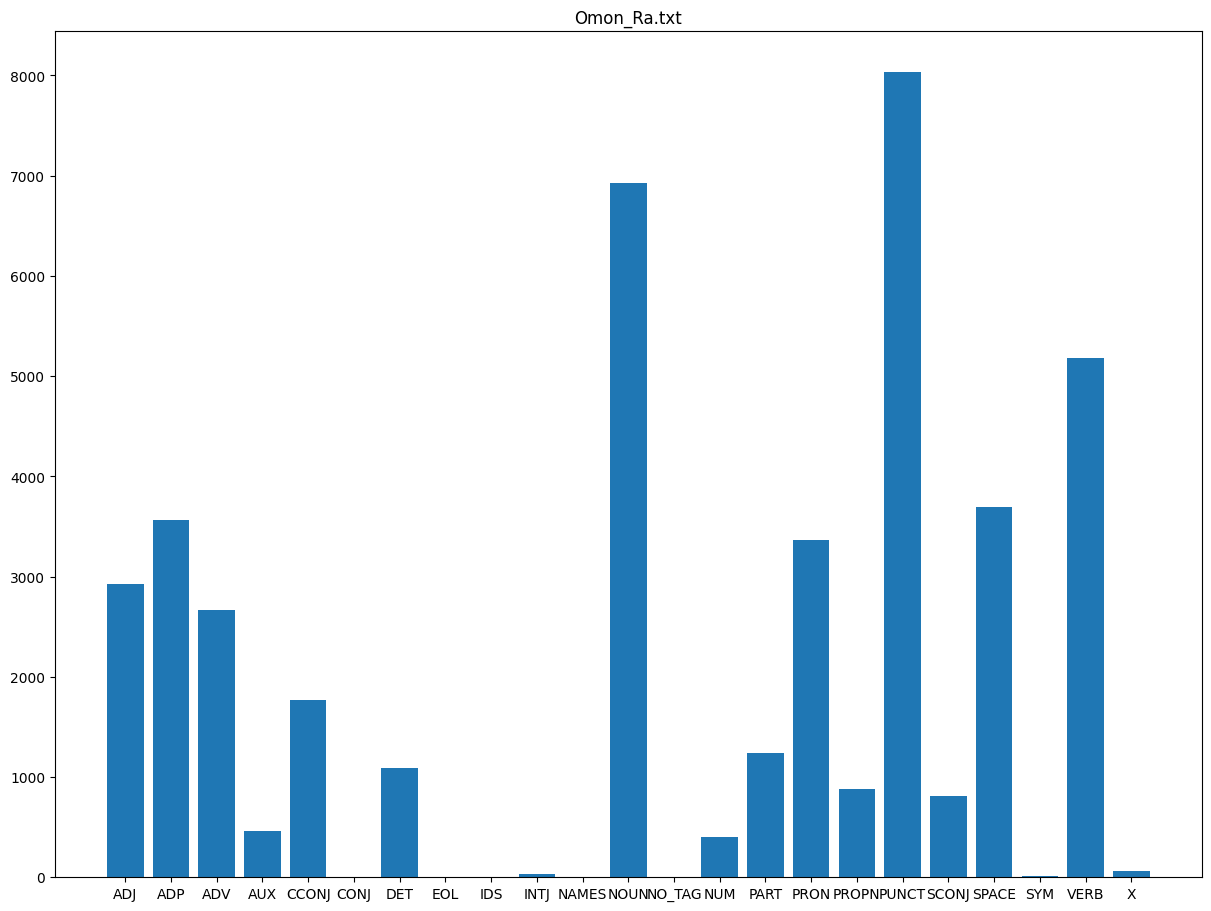

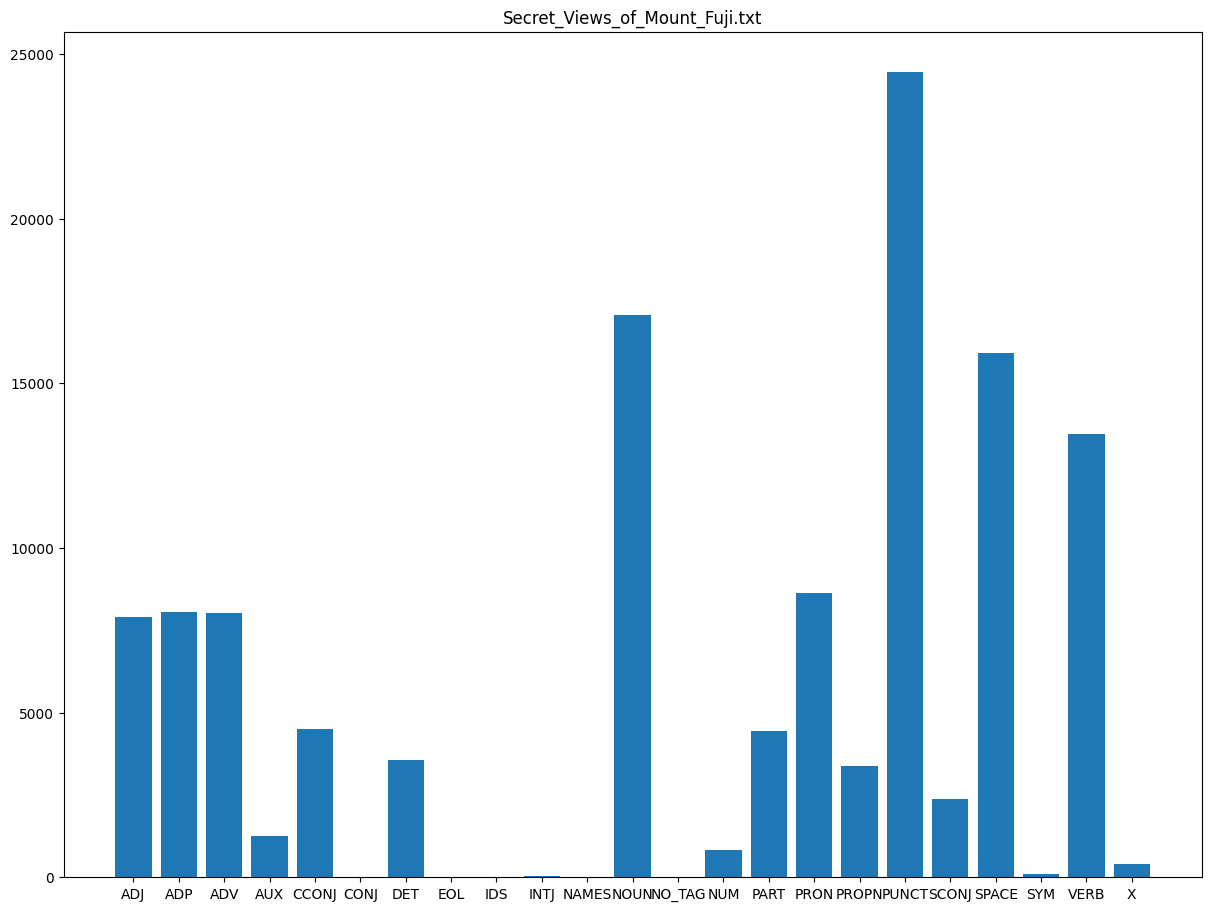

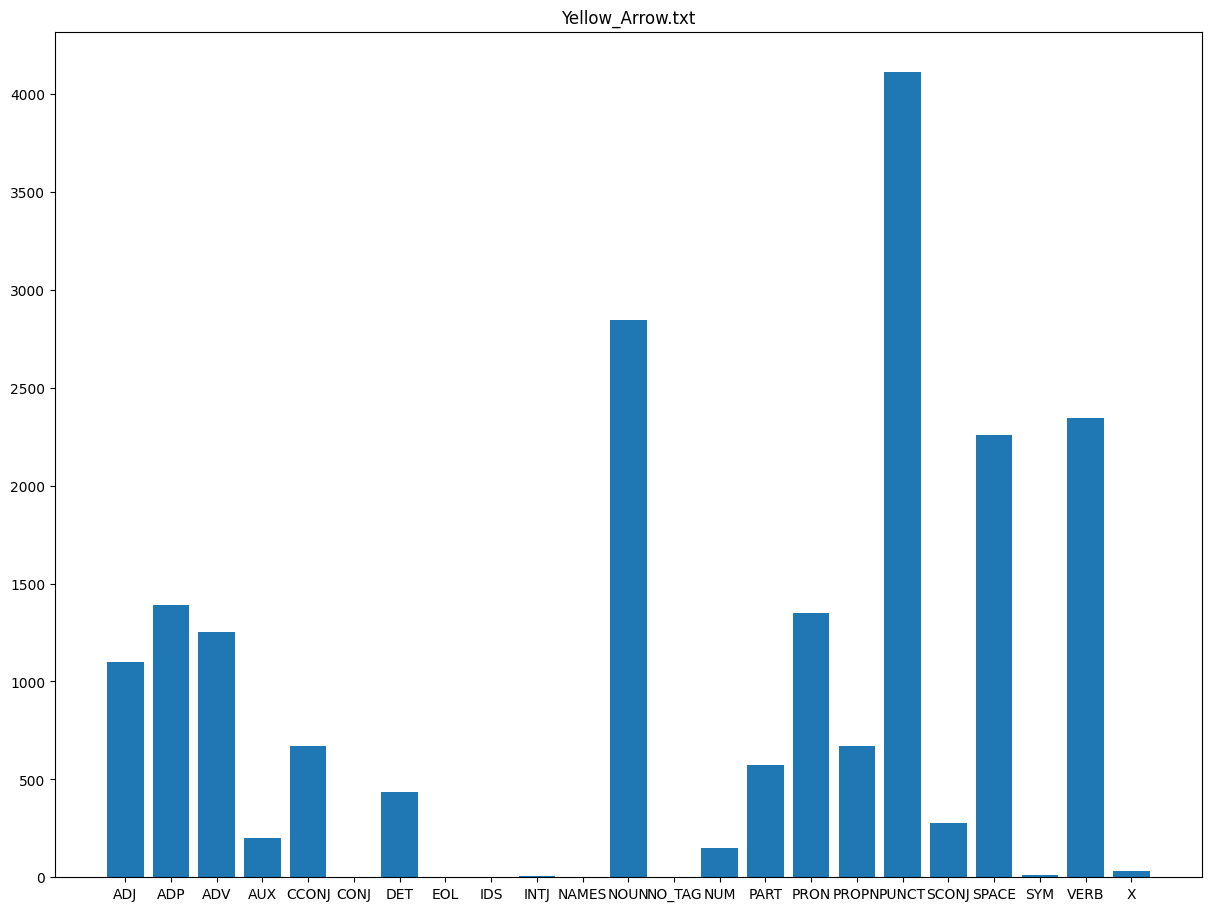

In [265]:
for r in pdist_df.iterrows():
    fig, ax = plt.subplots(figsize=(12, 9), layout='constrained')
    ax.bar(r[1][1:].index, r[1][1:].values)
    plt.title(r[1]["Title"])
    plt.show(block=False)

## График распределения по всем книгам

<Axes: xlabel='Title'>

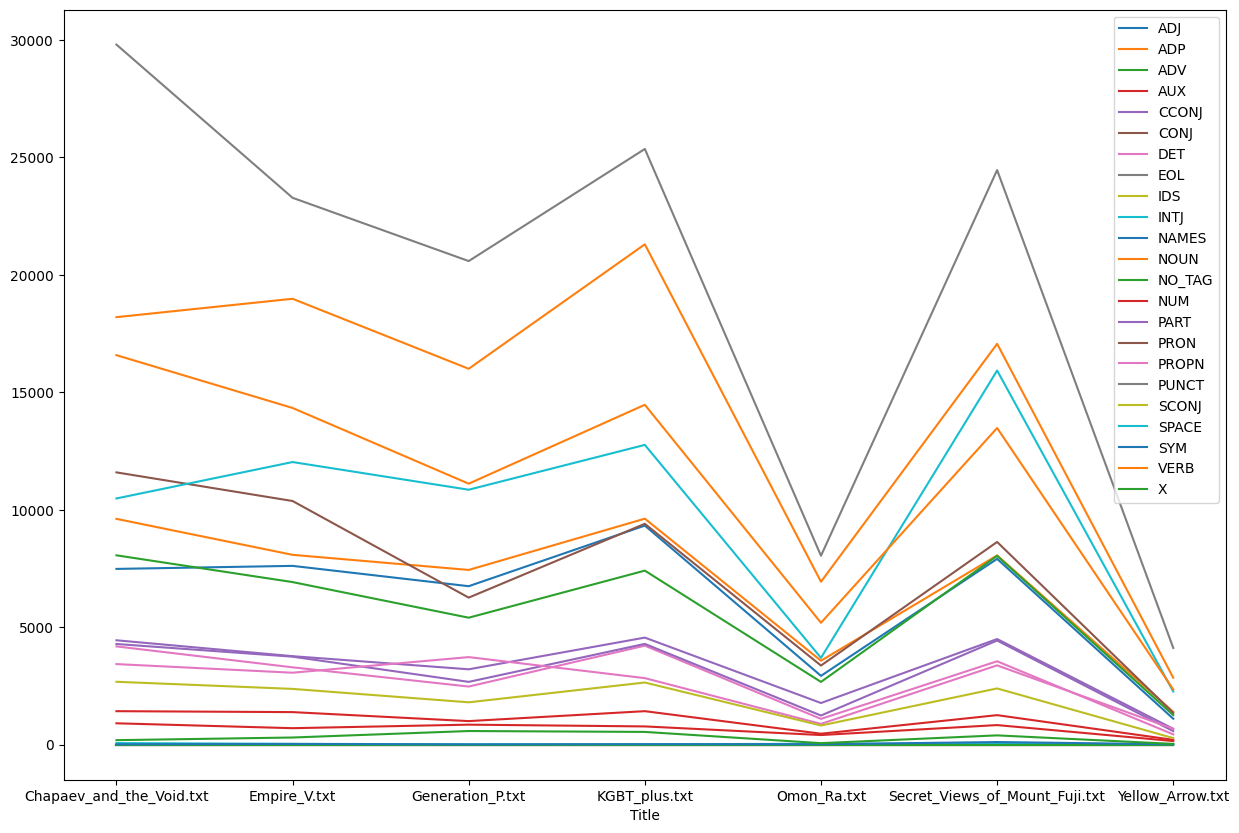

In [271]:
pdist_df.set_index("Title", inplace=False).plot(figsize=(15,10))